In [192]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
%matplotlib inline
from imblearn.over_sampling import SMOTE
from collections import Counter

#sklearn
from sklearn.metrics import classification_report,f1_score
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import pickle
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv("C:\\Users\\Man Prakash Vijay\\Downloads\\archive (2)\\hypothyroid.csv")

In [5]:
df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,P


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on thyroxine               3772 non-null   object
 3   query on thyroxine         3772 non-null   object
 4   on antithyroid medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid surgery            3772 non-null   object
 8   I131 treatment             3772 non-null   object
 9   query hypothyroid          3772 non-null   object
 10  query hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

In [7]:
df_categorical_col=df[['on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych','TSH measured', 'T3 measured', 'TT4 measured','T4U measured',
       'FTI measured','TBG measured','referral source','binaryClass']]


In [8]:
pd.Series({c: df_categorical_col[c].unique() for c in df_categorical_col})

on thyroxine                                         [f, t]
query on thyroxine                                   [f, t]
on antithyroid medication                            [f, t]
sick                                                 [f, t]
pregnant                                             [f, t]
thyroid surgery                                      [f, t]
I131 treatment                                       [f, t]
query hypothyroid                                    [f, t]
query hyperthyroid                                   [f, t]
lithium                                              [f, t]
goitre                                               [f, t]
tumor                                                [f, t]
hypopituitary                                        [f, t]
psych                                                [f, t]
TSH measured                                         [t, f]
T3 measured                                          [t, f]
TT4 measured                            

In [9]:
df=df.drop(['query on thyroxine','TSH measured', 'T3 measured', 'TT4 measured','T4U measured',
       'FTI measured','TBG measured','TBG','referral source'], axis=1)

### Check Missing values

In [10]:
df=df.replace('?',np.nan)

In [11]:
df.isna().sum()

age                            1
sex                          150
on thyroxine                   0
on antithyroid medication      0
sick                           0
pregnant                       0
thyroid surgery                0
I131 treatment                 0
query hypothyroid              0
query hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH                          369
T3                           769
TT4                          231
T4U                          387
FTI                          385
binaryClass                    0
dtype: int64

In [12]:
df=df.astype({'age': 'float64', 'T3': 'float64','TT4': 'float64','T4U': 'float64','FTI': 'float64','TSH':'float64'})

In [13]:
df=df.fillna(df[['age','TSH', 'T3','TT4','T4U','FTI']].mean())


In [14]:
df.shape

(3772, 21)

In [15]:
df.head()

,age,sex,on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,binaryClass
0,41.0,F,f,f,f,f,f,f,f,f,...,f,f,f,f,1.30,2.5000,125.0,1.140,109.000000,P
1,23.0,F,f,f,f,f,f,f,f,f,...,f,f,f,f,4.10,2.0000,102.0,0.995,110.469649,P
2,46.0,M,f,f,f,f,f,f,f,f,...,f,f,f,f,0.98,2.0135,109.0,0.910,120.000000,P
3,70.0,F,t,f,f,f,f,f,f,f,...,f,f,f,f,0.16,1.9000,175.0,0.995,110.469649,P
4,70.0,F,f,f,f,f,f,f,f,f,...,f,f,f,f,0.72,1.2000,61.0,0.870,70.000000,P


In [16]:
df=df.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [17]:
df.isna().sum()

age                          0
sex                          0
on thyroxine                 0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH                          0
T3                           0
TT4                          0
T4U                          0
FTI                          0
binaryClass                  0
dtype: int64

#### There are no missing values in the data set

### Encoding

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
df.columns

Index(['age', 'sex', 'on thyroxine', 'on antithyroid medication', 'sick',
       'pregnant', 'thyroid surgery', 'I131 treatment', 'query hypothyroid',
       'query hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary',
       'psych', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'binaryClass'],
      dtype='object')

In [36]:
df[['sex', 'on thyroxine', 'on antithyroid medication', 'sick',
       'pregnant', 'thyroid surgery', 'I131 treatment', 'query hypothyroid',
       'query hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary',
       'psych','binaryClass']]=df[['sex', 'on thyroxine', 'on antithyroid medication', 'sick',
       'pregnant', 'thyroid surgery', 'I131 treatment', 'query hypothyroid',
       'query hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary',
       'psych','binaryClass']].apply(LabelEncoder().fit_transform)

In [37]:
df

,age,sex,on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,binaryClass
0,41.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1.300000,2.5000,125.000000,1.140,109.000000,1
1,23.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,4.100000,2.0000,102.000000,0.995,110.469649,1
2,46.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.980000,2.0135,109.000000,0.910,120.000000,1
3,70.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0.160000,1.9000,175.000000,0.995,110.469649,1
4,70.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.720000,1.2000,61.000000,0.870,70.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30.0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,5.086766,2.0135,108.319345,0.995,110.469649,1
3768,68.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1.000000,2.1000,124.000000,1.080,114.000000,1
3769,74.0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,5.100000,1.8000,112.000000,1.070,105.000000,1
3770,72.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.700000,2.0000,82.000000,0.940,87.000000,1


In [188]:
df['binaryClass'].value_counts()

1    3417
0     291
Name: binaryClass, dtype: int64

### Check Outliers

<Axes: ylabel='age'>

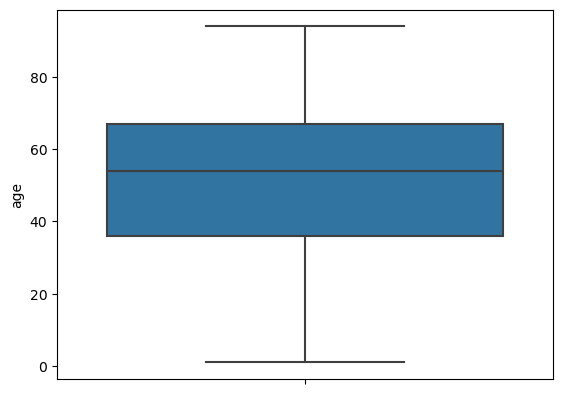

In [38]:
sns.boxplot(data= df, y='age')

In [19]:
index_name=df[df['age']==455].index

In [20]:
df.drop(index_name[0], axis=0,inplace=True)

In [21]:
df.shape

(3771, 21)

### Check for Duplicates

In [22]:
df.duplicated().sum()

63

In [23]:
df=df.drop_duplicates()

In [24]:
df.duplicated().sum()

0

###### There are no more duplicate values

### EDA

<Axes: xlabel='sex', ylabel='count'>

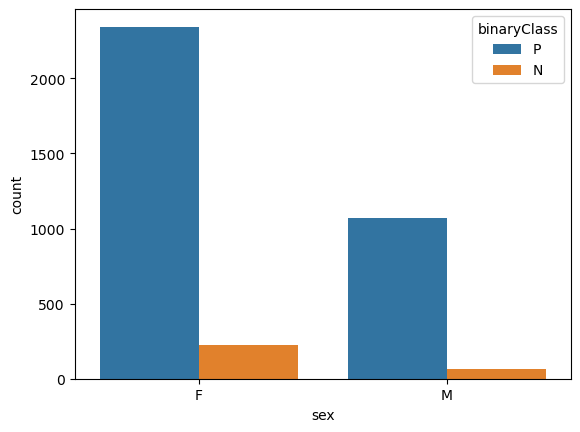

In [25]:
sns.countplot(data=df, x='sex', hue='binaryClass')

In [58]:
df_corr = df.corr()
df_corr

,age,sex,on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,binaryClass
age,1.000000,-0.000574,0.015306,-0.064016,0.084589,-0.121059,-0.031516,0.056092,0.042024,-0.039446,...,-0.055295,-0.026785,-0.026573,-0.106873,-0.058948,-0.228934,-0.042081,-0.171929,0.053964,0.003563
sex,-0.000574,1.000000,-0.099680,-0.027020,0.005649,-0.080131,-0.035794,-0.023866,-0.045248,-0.064486,...,0.009602,-0.075345,0.024682,0.098361,-0.033833,-0.064525,-0.168480,-0.222790,-0.042357,0.052857
on thyroxine,0.015306,-0.099680,1.000000,-0.001969,-0.043422,0.009393,0.036860,0.062642,0.092915,-0.024409,...,-0.010728,-0.030862,-0.006212,-0.075159,0.017126,0.006489,0.213019,0.046521,0.185868,0.083090
on antithyroid medication,-0.064016,-0.027020,-0.001969,1.000000,-0.021747,0.072992,-0.012889,0.006756,-0.017298,0.118952,...,-0.010297,-0.017450,-0.001758,-0.024458,-0.010803,0.080146,0.024076,0.061108,-0.016843,0.021759
sick,0.084589,0.005649,-0.043422,-0.021747,1.000000,-0.024466,-0.001178,-0.025835,0.026848,-0.035678,...,-0.019545,0.010393,-0.003337,-0.033697,-0.022124,-0.076500,-0.037059,-0.039036,-0.021277,0.002757
pregnant,-0.121059,-0.080131,0.009393,0.072992,-0.024466,1.000000,-0.014501,-0.015312,-0.021909,0.118252,...,0.012253,0.123438,-0.001978,-0.017054,-0.019706,0.181168,0.172512,0.334798,-0.016749,0.035141
thyroid surgery,-0.031516,-0.035794,0.036860,-0.012889,-0.001178,-0.014501,1.000000,0.002845,-0.012565,0.015468,...,-0.011584,-0.005325,-0.001978,-0.027516,0.026223,-0.024150,-0.021833,0.027958,-0.031884,0.018244
I131 treatment,0.056092,-0.023866,0.062642,0.006756,-0.025835,-0.015312,0.002845,1.000000,0.046770,0.064497,...,-0.012232,-0.020730,-0.002088,-0.029056,-0.004137,0.012057,-0.008873,0.009439,-0.016870,-0.002963
query hypothyroid,0.042024,-0.045248,0.092915,-0.017298,0.026848,-0.021909,-0.012565,0.046770,1.000000,0.019308,...,-0.024967,-0.035327,-0.004263,-0.013338,0.025970,-0.047526,-0.009065,0.013905,-0.019832,-0.085108
query hyperthyroid,-0.039446,-0.064486,-0.024409,0.118952,-0.035678,0.118252,0.015468,0.064497,0.019308,1.000000,...,-0.024967,0.055466,-0.004263,-0.059304,-0.006558,0.167315,0.128655,0.074824,0.102793,0.013874


<Axes: >

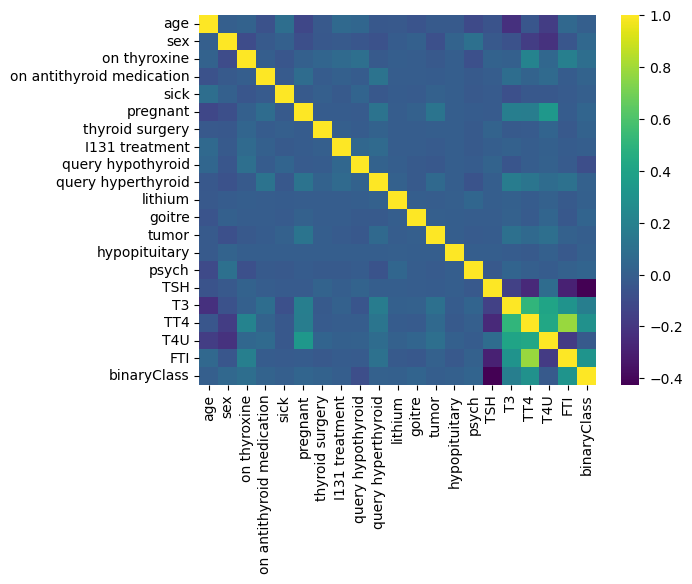

In [65]:
sns.heatmap(df_corr,cbar=True,cmap='viridis')

<Axes: >

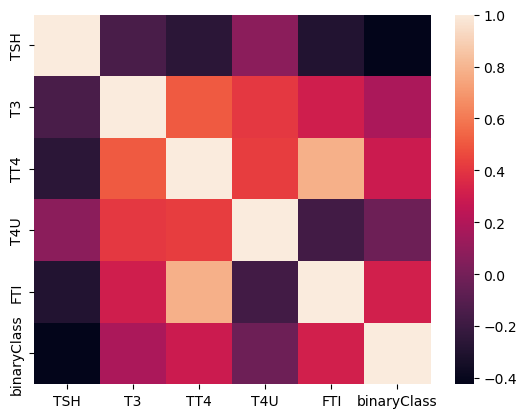

In [77]:
sns.heatmap(df_corr.iloc[-6:,-6:],cbar=True)

<Axes: xlabel='age', ylabel='Count'>

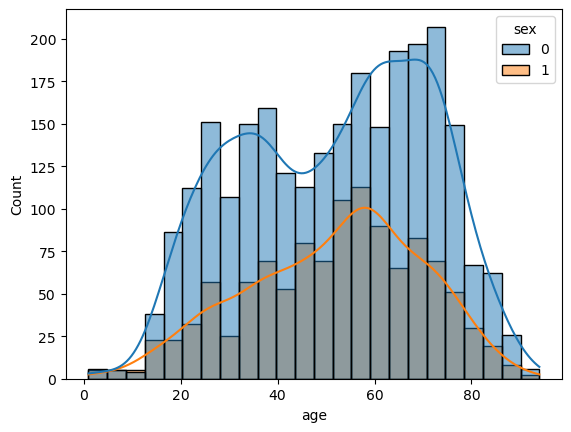

In [86]:
sns.histplot(data=df,x='age',kde=True,hue='sex')

###### -Thyroid is present in maximum amount of population.

###### -Number of Females suffering from thyroid is more than the number of males.

###### -The majority of individuals affected by thyroid issues are women aged between 20 and 40, as well as women aged between 60 and 75.

###### -In contrast, thyroid problems are primarily seen in men between the ages of 50 and 60.

## Data Preprocessing

In [96]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [97]:
# separate dataset into train and test
X_train,X_test,y_train,y_test=train_test_split(df.iloc[:,:-1],df.iloc[:,-1:],test_size=0.2,random_state=42)

In [100]:
X_train.shape, X_test.shape

((2966, 20), (742, 20))

#### Handle Imbalance Dataset

In [193]:
smote=SMOTE(sampling_strategy=1,random_state=11)

In [194]:
X_smote, y_smote=smote.fit_resample(X_train,y_train)

In [195]:
print("Shape before the Oversampling : ",X_train.shape)
print("Shape after the Oversampling : ",X_smote.shape)

Shape before the Oversampling :  (2966, 20)
Shape after the Oversampling :  (5482, 20)


In [196]:
y_smote.value_counts()

binaryClass
0              2741
1              2741
dtype: int64

In [197]:
y_train.value_counts()

binaryClass
1              2741
0               225
dtype: int64

In [198]:
ss=StandardScaler()

In [199]:
X_smote[['age','TSH', 'T3', 'TT4', 'T4U', 'FTI']]=ss.fit_transform(X_smote[['age','TSH', 'T3', 'TT4', 'T4U', 'FTI']])

In [200]:
X_smote.head()

,age,sex,on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI
0,0.383017,1,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.341566,0.406988,-0.400304,-1.637160,0.344331
1,-0.815970,0,1,0,0,0,0,0,0,0,0,0,0,0,0,-0.356703,-0.279559,0.623462,-0.527547,0.894691
2,1.527505,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.329660,-1.652653,-0.321553,-1.753962,0.564475
3,0.492016,0,1,0,0,0,0,0,0,0,0,0,0,0,0,-0.300746,1.230845,-0.216551,0.173261,-0.371136
4,0.219519,1,0,0,0,0,0,0,1,0,0,0,0,0,0,-0.366228,0.132369,1.174720,0.523665,0.867173


In [201]:
X_smote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5482 entries, 0 to 5481
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        5482 non-null   float64
 1   sex                        5482 non-null   int64  
 2   on thyroxine               5482 non-null   int64  
 3   on antithyroid medication  5482 non-null   int64  
 4   sick                       5482 non-null   int64  
 5   pregnant                   5482 non-null   int64  
 6   thyroid surgery            5482 non-null   int64  
 7   I131 treatment             5482 non-null   int64  
 8   query hypothyroid          5482 non-null   int64  
 9   query hyperthyroid         5482 non-null   int64  
 10  lithium                    5482 non-null   int64  
 11  goitre                     5482 non-null   int64  
 12  tumor                      5482 non-null   int64  
 13  hypopituitary              5482 non-null   int64

In [205]:
X_test[['age','TSH', 'T3', 'TT4', 'T4U', 'FTI']]=ss.transform(X_test[['age','TSH', 'T3', 'TT4', 'T4U', 'FTI']])

## Building Model

In [206]:
def evaluate_model(true, predicted,check):
    
    print(f"Accuracy Score is : ",model.score(true,predicted)*100,"%")
    
    '''if check==True:
        print(f"Classification Report")
        print("----------------------------------------------------------")
        print(classification_report(true,predicted))
        print("----------------------------------------------------------")'''
    return

In [207]:
models = {
    "Support Vector Machine": SVC(),
    "Logistic Regression": LogisticRegression(),
    "K-Neighbors Classifier": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier()
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_smote, y_smote) # Train model

    # Make predictions
    y_train_pred = model.predict(X_smote) 
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    print(list(models.keys())[i])
      
    evaluate_model(X_smote, y_smote,False)

    evaluate_model(X_test, y_test,True)
    
    print("----------------------------------------------------------")
    print(classification_report(y_test,y_test_pred))
    print("----------------------------------------------------------")

    '''model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)'''
    
    print('='*58)
    print('\n')

Support Vector Machine
Accuracy Score is :  97.22728931047064 %
Accuracy Score is :  95.28301886792453 %
----------------------------------------------------------
              precision    recall  f1-score   support

           0       0.69      0.85      0.76        66
           1       0.98      0.96      0.97       676

    accuracy                           0.95       742
   macro avg       0.84      0.91      0.87       742
weighted avg       0.96      0.95      0.95       742

----------------------------------------------------------


Logistic Regression
Accuracy Score is :  97.15432323969354 %
Accuracy Score is :  96.22641509433963 %
----------------------------------------------------------
              precision    recall  f1-score   support

           0       0.74      0.88      0.81        66
           1       0.99      0.97      0.98       676

    accuracy                           0.96       742
   macro avg       0.87      0.92      0.89       742
weighted avg   

In [ ]:
DT=DecisionTreeClassifier()
DT.fit(X_smote,y_smote)